In [1]:
import numpy as np
import scipy

# Setting up the dimension
n = 15

# Creating the test problem (with a Random matrix)
A = scipy.linalg.hilbert(n) # n x n hilber matrix
x_true = np.ones((n, ))   # n-dimensional vector of ones

y = A @ x_true # Compute the term y s.t. x_true is a sol.

# Solving the system with numpy
x_sol = np.linalg.solve(A, y)

# Computing the accuracy
E_rel = np.linalg.norm(x_true - x_sol, 2) / np.linalg.norm(x_true, 2)
print(f"The relative error is {E_rel}")
print(x_sol)

The relative error is 1.9326759080352935
[ 0.99999995  1.00000807  0.99967264  1.00577502  0.94490775  1.31657382
 -0.15652389  3.72666552 -3.00357812  4.04053468  1.3253252  -2.17033528
  4.1161354  -0.39618677  1.25102602]


Condition number for n = 1: 1.0.
Condition number for n = 2: 19.281470067903967.
Condition number for n = 3: 524.0567775860627.
Condition number for n = 4: 15513.738738929662.
Condition number for n = 5: 476607.2502419222.
Condition number for n = 6: 14951058.641931808.
Condition number for n = 7: 475367356.51983196.
Condition number for n = 8: 15257576052.786306.
Condition number for n = 9: 493153909929.7127.
Condition number for n = 10: 16024897439077.97.
Condition number for n = 11: 521959222338558.8.
Condition number for n = 12: 1.6360718665566702e+16.


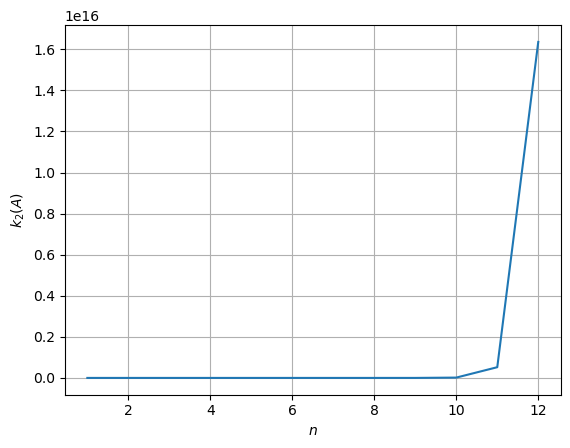

In [2]:
# We want to print out the condition number of the hilbert matrix A 
# for increasing dimension
n_max = 12

condition_numbers = np.zeros((n_max, ))
for n in range(1, n_max+1):
    # Define the hilbert matrix
    A = scipy.linalg.hilbert(n)

    # Compute the condition number
    cond = np.linalg.cond(A, p=2)

    # Print and save
    print(f"Condition number for n = {n}: {cond}.")
    condition_numbers[n-1] = cond # "n-1" because range begins by 1!

# Plot the condition number in semilogy plot
import matplotlib.pyplot as plt
plt.plot(np.arange(1, n_max+1), condition_numbers)
plt.grid()
plt.xlabel(r"$n$")
plt.ylabel(r"$k_2(A)$")
plt.show()

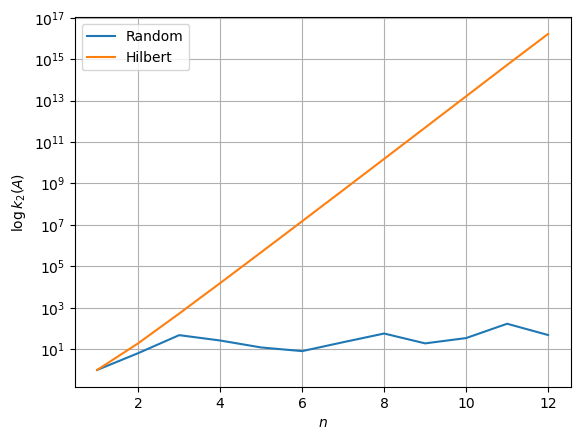

In [3]:
# We want to print out the condition number of the hilbert matrix vs random matrix
# for increasing dimension
n_max = 12

condition_numbers_rand = np.zeros((n_max, ))
condition_numbers_hilb = np.zeros((n_max, ))
for n in range(1, n_max+1):
    # Define the hilbert matrix
    A_rand = np.random.randn(n, n)
    A_hilb = scipy.linalg.hilbert(n)

    # Compute the condition number
    cond_rand = np.linalg.cond(A_rand, p=2)
    cond_hilb = np.linalg.cond(A_hilb, p=2)

    # Print and save
    condition_numbers_rand[n-1] = cond_rand # "n-1" because range begins by 1!
    condition_numbers_hilb[n-1] = cond_hilb # "n-1" because range begins by 1!

# Plot the condition number in semilogy plot
import matplotlib.pyplot as plt
plt.semilogy(np.arange(1, n_max+1), condition_numbers_rand)
plt.semilogy(np.arange(1, n_max+1), condition_numbers_hilb)
plt.grid()
plt.xlabel(r"$n$")
plt.ylabel(r"$\log k_2(A)$")
plt.legend(["Random", "Hilbert"])
plt.show()

In [4]:
import numpy as np
import scipy
import scipy.linalg

# Setting up the dimension
n = 15

# Creating the test problem (with Hilbert matrix)
A_random = np.random.randn(n, n) # n x n random matrix
A_hilbert = scipy.linalg.hilbert(n) # n x n hilbert matrix

print(f"Cond. Number Random matrix: {np.linalg.cond(A_random, p=2)}")
print(f"Cond. Number Hilbert matrix: {np.linalg.cond(A_hilbert, p=2)}")

Cond. Number Random matrix: 20.929708930403063
Cond. Number Hilbert matrix: 2.3228053763031325e+17


In [5]:
import numpy as np
import scipy
import scipy.linalg

# Define the dimension of the problem
n = 1000

#### IMPORTANT: Build test problem
A = np.random.randn(n, n)
x_true = np.ones((n, ))

y = A @ x_true

# Now we forget about x_true, and we solve Ax = y

#### Solve with np.linalg.solve()
x_sol1 = np.linalg.solve(A, y)
print(f"Rel. Err1: {np.linalg.norm(x_sol1 - x_true) / np.linalg.norm(x_true)}")


#### Solve with Forward-Backward
P, L, U = scipy.linalg.lu(A)
Pty = P.T @ y

# Solve the first system
z = scipy.linalg.solve_triangular(L, Pty, lower=True)

# Solve the second system
x_sol2 = scipy.linalg.solve_triangular(U, z, lower=False)
print(f"Rel. Err2: {np.linalg.norm(x_sol2 - x_true) / np.linalg.norm(x_true)}")

Rel. Err1: 1.7139936489018568e-13
Rel. Err2: 2.513962546063148e-13


In [6]:
import numpy as np
import scipy
import scipy.linalg

# Define the dimension of the problem
n = 13

#### IMPORTANT: Build test problem
A = scipy.linalg.hilbert(n)
x_true = np.ones((n, ))

y = A @ x_true

# Now we forget about x_true, and we solve Ax = y

# CHOLESKY DECOMPOSITION
L = np.linalg.cholesky(A)

# Solve the first system
z = scipy.linalg.solve_triangular(L, y, lower=True)

# Solve the second system
x_sol = scipy.linalg.solve_triangular(L.T, z, lower=False)
print(f"Rel. Err: {np.linalg.norm(x_sol - x_true) / np.linalg.norm(x_true)}")

Rel. Err: 5.653443742604652
